In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',1000)


# 분양권은 로또 증명

### 1. 데이터 불러오기

In [124]:
# 마스터 테이블 불러오기
df = pd.read_csv('data/cluster/2차군집8_비인도데프.csv')
df

,id,quarter,전용면적_미제,거래금액,건축년도,보증금,매매상승률,전세상승률,전세가율,평당매매가,매매빈도,전세빈도,위도,경도,서울구분,6억초과,규제,평당거주비용,cluster,2nd_cluster
0,경기도 고양덕양구 고양동_고양동우방유쉘아파트_60,2017_1Q,60.0,199.500000,2007.0,166.666667,0.000000,1.010101,83.542189,11.083333,0.0,6.0,37.700477,126.899362,0,0,해당 없음,0.353189,1,1
1,경기도 고양덕양구 고양동_고양동우방유쉘아파트_60,2017_2Q,60.0,203.000000,2007.0,166.666667,1.754386,0.000000,82.101806,11.277778,2.0,0.0,37.700477,126.899362,0,0,해당 없음,0.364272,1,1
2,경기도 고양덕양구 고양동_고양동우방유쉘아파트_60,2017_3Q,60.0,200.666667,2007.0,175.000000,-1.149425,5.000000,87.209302,11.148148,3.0,3.0,37.700477,126.899362,0,0,해당 없음,0.364173,1,1
3,경기도 고양덕양구 고양동_고양동우방유쉘아파트_60,2017_4Q,60.0,209.000000,2007.0,170.000000,4.152824,-2.857143,81.339713,11.611111,1.0,2.0,37.700477,126.899362,0,0,조정대상지역,0.392456,1,1
4,경기도 고양덕양구 고양동_고양동우방유쉘아파트_60,2018_1Q,60.0,209.000000,2007.0,170.000000,0.000000,0.000000,81.339713,11.611111,4.0,3.0,37.700477,126.899362,0,0,조정대상지역,0.401744,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380281,인천광역시 중구 항동7가_연안아파트_54,2020_2Q,54.0,229.277778,1983.0,21.666667,8.392082,-5.797101,9.449964,14.329861,18.0,4.0,37.448902,126.620839,0,0,해당 없음,0.362545,1,1
380282,인천광역시 중구 항동7가_연안아파트_54,2020_3Q,54.0,210.000000,1983.0,18.285714,-8.408045,-15.604396,8.707483,13.125000,3.0,9.0,37.448902,126.620839,0,0,조정대상지역,0.318500,1,1
380283,인천광역시 중구 항동7가_연안아파트_54,2020_4Q,54.0,204.692308,1983.0,20.000000,-2.527473,9.375000,9.770763,12.793269,13.0,2.0,37.448902,126.620839,0,0,조정대상지역,0.324949,1,1
380284,인천광역시 중구 항동7가_연안아파트_54,2021_1Q,54.0,232.360000,1983.0,20.333333,13.516723,1.666667,8.750789,14.522500,25.0,5.0,37.448902,126.620839,0,0,조정대상지역,0.388235,1,1


In [125]:
# 1차군집 3번 + 2017년도 1분기
df_total = df[(df.quarter == '2017_1Q') & (df.cluster == 3)]
df_total.shape

(988, 20)

In [126]:
# 1차군집 3번 + 2017년도 1분기 + 건축년도 2017년 이후인 신축아파트
df_condition = df[(df.quarter == '2017_1Q') & (df.cluster == 3)&(df.건축년도 >= 2017)]
df_condition.shape

(778, 20)

###  2017년도 1분기에 1차군집 번호가 3인 데이터 수: 988
### 거기에 건축년도가 2017년도 이상인 데이터 : 778
### 따라서 778/988 * 100  = 78.74493927125506 %

In [127]:
778/988 * 100

78.74493927125506

In [128]:
# 1차군집 3번 + 2017년도 1분기 + 건축년도 2017년 이후인 신축아파트 id 리스트
condition_ids = df_condition.id.unique().tolist()

In [104]:
# 위의 id리스트에 해당하는 데이터들의 2021년도 2분기 데이터를 확인
df_result = df[(df.id.isin(condition_ids)) & (df.quarter == '2021_2Q')]
df_result

,id,quarter,전용면적_미제,거래금액,건축년도,보증금,매매상승률,전세상승률,전세가율,평당매매가,매매빈도,전세빈도,위도,경도,서울구분,6억초과,규제,평당거주비용,cluster,2nd_cluster
809,경기도 고양덕양구 도내동_고양원흥동일스위트_85,2021_2Q,85.0,987.400000,2018.0,443.350000,-7.719626,-17.581994,44.900749,37.976923,5.0,7.0,37.625796,126.871236,0,1,조정대상지역,1.032972,5,7
953,경기도 고양덕양구 도내동_원흥호반베르디움더퍼스트5단지_70,2021_2Q,70.0,837.500000,2017.0,530.000000,20.793269,16.440864,63.283582,39.880952,4.0,3.0,37.628315,126.865909,0,1,조정대상지역,1.084762,5,5
971,경기도 고양덕양구 도내동_원흥호반베르디움더퍼스트5단지_85,2021_2Q,85.0,889.000000,2017.0,349.000000,-6.910995,-29.007323,39.257593,34.192308,2.0,4.0,37.628315,126.865909,0,1,조정대상지역,0.930031,5,7
2321,경기도 고양덕양구 신원동_고양삼송동일스위트파크뷰7(1차)_85,2021_2Q,85.0,800.000000,2017.0,443.125000,2.893891,-6.192114,55.390625,32.000000,3.0,9.0,37.666606,126.883740,0,1,조정대상지역,0.870400,5,5
2339,경기도 고양덕양구 신원동_삼송10단지동일스위트2차_67,2021_2Q,67.0,691.600000,2018.0,370.975000,4.208940,-21.348057,53.640110,34.580000,5.0,2.0,37.659980,126.886460,0,1,조정대상지역,0.940576,4,0
2357,경기도 고양덕양구 신원동_삼송10단지동일스위트2차_77,2021_2Q,77.0,780.000000,2018.0,444.050000,12.749350,0.000000,56.929487,33.913043,2.0,0.0,37.659980,126.886460,0,1,조정대상지역,0.922435,5,5
2375,경기도 고양덕양구 신원동_삼송10단지동일스위트2차_85,2021_2Q,85.0,774.000000,2018.0,550.000000,0.000000,15.789474,71.059432,29.769231,0.0,1.0,37.659980,126.886460,0,1,조정대상지역,0.809723,5,7
2591,경기도 고양덕양구 원흥동_삼송원흥역센트럴푸르지오_73,2021_2Q,73.0,889.000000,2018.0,500.000000,0.000000,0.000000,56.242970,40.409091,0.0,1.0,37.649019,126.876373,0,1,조정대상지역,1.099127,5,7
2609,경기도 고양덕양구 원흥동_삼송원흥역센트럴푸르지오_85,2021_2Q,85.0,978.750000,2018.0,581.250000,0.000000,0.000000,59.386973,38.382353,0.0,0.0,37.649019,126.876373,0,1,조정대상지역,1.044000,5,7
2627,경기도 고양덕양구 원흥동_삼송원흥역센트럴푸르지오_92,2021_2Q,92.0,1014.000000,2018.0,472.500000,0.000000,-32.740214,46.597633,36.214286,0.0,1.0,37.649019,126.876373,0,1,조정대상지역,0.985029,5,7


In [129]:
# 2017년도 3번군짐이 2021년도 2분기에 최종 이동한 군집
df_result.cluster.value_counts()

4    291
5    275
6    127
2     53
3     26
7      6
Name: cluster, dtype: int64

In [186]:
roi = pd.DataFrame(columns=['cluster', '전체상승률 0', '2017_1Q_sum', '2021_2Q_sum', '전체상승률'])

# 전체상승률 출력 함수
def rateOfIncrease(n):
    df_17_n = df[(df.quarter == '2017_1Q') & (df.cluster == n)]
    start = df_17_n.거래금액.sum()

    cdt = df[(df.quarter == '2017_1Q') & (df.cluster == n)].id.unique().tolist()

    df_21_n = df[(df.quarter=='2021_2Q') & (df.id.isin(cdt))]

    end = df_21_n.거래금액.sum()
    print('---------------------------------',start, end)
    result = ((end - start) / start) * 100
    print(result)
    roi.loc[n] = [round(n,0), 0,start, end, result]

    

for i in range(1, 8):
    rateOfIncrease(i)

roi

--------------------------------- 999476.6486699646 1436822.470900142
43.7574827598191
--------------------------------- 2381975.6548689823 4078404.5839571944
71.21940669798836
--------------------------------- 429928.6808902408 810063.1440349137
88.41802839427683
--------------------------------- 2361939.503571025 4403483.951622443
86.43508629094012
--------------------------------- 1416840.9044803677 2700348.194655768
90.58937288700965
--------------------------------- 840051.6459426696 1457358.644642857
73.48441035520764
--------------------------------- 273719.4333333333 431762.6533333333
57.73913020181373


,cluster,전체상승률 0,2017_1Q_sum,2021_2Q_sum,전체상승률
1,1.0,0.0,9.994766e+05,1.436822e+06,43.757483
2,2.0,0.0,2.381976e+06,4.078405e+06,71.219407
3,3.0,0.0,4.299287e+05,8.100631e+05,88.418028
4,4.0,0.0,2.361940e+06,4.403484e+06,86.435086
5,5.0,0.0,1.416841e+06,2.700348e+06,90.589373
6,6.0,0.0,8.400516e+05,1.457359e+06,73.484410
7,7.0,0.0,2.737194e+05,4.317627e+05,57.739130


In [188]:
roi1 = pd.DataFrame(columns=['cluster','전체상승률','quarter'])
roi1.loc[1] = [1.0,0,'2017_1Q']
roi1.loc[2] = [2.0,0,'2017_1Q']
roi1.loc[3] = [3.0,0,'2017_1Q']
roi1.loc[4] = [4.0,0,'2017_1Q']
roi1.loc[5] = [5.0,0,'2017_1Q']
roi1.loc[6] = [6.0,0,'2017_1Q']
roi1.loc[7] = [7.0,0,'2017_1Q']
roi1

,cluster,전체상승률,quarter
1,1.0,0,2017_1Q
2,2.0,0,2017_1Q
3,3.0,0,2017_1Q
4,4.0,0,2017_1Q
5,5.0,0,2017_1Q
6,6.0,0,2017_1Q
7,7.0,0,2017_1Q


In [189]:
roi2 = roi[['cluster','전체상승률']]
roi2['quarter'] = '2021_2Q'
roi2

<ipython-input-189-a975575e9a50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roi2['quarter'] = '2021_2Q'


,cluster,전체상승률,quarter
1,1.0,43.757483,2021_2Q
2,2.0,71.219407,2021_2Q
3,3.0,88.418028,2021_2Q
4,4.0,86.435086,2021_2Q
5,5.0,90.589373,2021_2Q
6,6.0,73.484410,2021_2Q
7,7.0,57.739130,2021_2Q


In [190]:
roi = pd.concat([roi1, roi2])
roi.전체상승률 = roi.전체상승률.astype(float)
roi

,cluster,전체상승률,quarter
1,1.0,0,2017_1Q
2,2.0,0,2017_1Q
3,3.0,0,2017_1Q
4,4.0,0,2017_1Q
5,5.0,0,2017_1Q
6,6.0,0,2017_1Q
7,7.0,0,2017_1Q
1,1.0,43.757483,2021_2Q
2,2.0,71.219407,2021_2Q
3,3.0,88.418028,2021_2Q


# 전체상승률 시각화: pyplot으로 그려보기

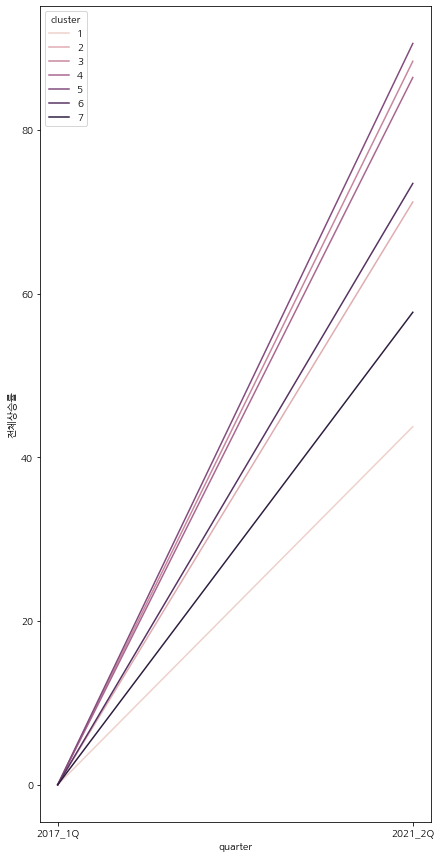

In [197]:
# 전체상승률 시각화
plt.figure(figsize=(7,15))
sns.lineplot(data=roi, x='quarter', y='전체상승률', hue='cluster')
plt.show()

In [277]:
df.to_csv('data/etc/전체상승률_비인도데프3.csv', index=False, encoding='utf-8-sig')